# Análise do Perfil dos Clientes - SPC Brasil

O SPC Brasil é uma empresa de tecnologia vinculada à CNDL para processar e armazenar todas as operações de crédito realizadas pelas empresas. É um serviço de informações de crédito, que utiliza informações de adimplência e inadimplência de pessoas físicas ou jurídicas para fins de decisão sobre crédito. Possuem produtos como o Cadastro positivo entre outros.
![spc](https://github.com/arcursino/credit-bureau/blob/master/imagens/logo_spc.png)

Ao longo da análise do dataset enviado pela empresa, será demostrado alguns *insights*.

<a name='TOPO'></a>
<h1>Índice</h1>
<ol>
<li><a href='#DATACLEANING'>Limpeza de Dados e primeiras Análises do Dataset</a></li>
<li><a href='#DATAANALYSIS'>Análise dos Dados e Visualização dos Dados</a></li>
<li><a href='#DATAVISUALIZATION'>Visualização dos Dados (Data Visualization)</li>
<li><a href='#CONCLUSAO'>Conclusão</li>
</ol>

<a name='DATACLEANING'></a>
<h1>Limpeza de Dados e primeiras Análises do Dataset</h1>

Análise inicial do dataset e algumas transformações necessárias para as análises futuras.

In [1]:
#importa os módulos
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import chardet

In [2]:
#Leitura do dataset
with open('dataset_v01.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

data = pd.read_csv('dataset_v01.csv', sep=',', encoding=result['encoding'])

In [3]:
# Cabeçalho do dataset e suas primeiras 5 linhas
data.head()

id              dat_nsc  \
0  d6c0cc1d-eb61-486a-b5c3-50725ef44d61  1981-01-30 00:00:00   
1  da0067e7-aa6b-4355-b373-ca17f6ac3b44  1978-01-28 00:00:00   
2  2d729b8a-d53c-48e7-8bf5-33b021980c04  1954-12-09 00:00:00   
3  62c0f1e6-36f2-4205-a134-232a58a6f8a5  1975-08-28 00:00:00   
4  0cef9719-0aa3-49a2-adea-9c09c04de071  1957-06-17 00:00:00   

                          renda   latitude  longitude  
0  DE R$ 1.900,00 A R$ 3.800,00  -4.847580 -37.784390  
1  DE R$ 3.800,00 A R$ 7.600,00 -26.990118 -48.637165  
2  DE R$ 3.800,00 A R$ 7.600,00  -5.053671 -42.813152  
3    DE R$ 788,00 A R$ 1.140,00 -15.059042 -48.163372  
4    DE R$ 788,00 A R$ 1.140,00 -17.694658 -42.522280

In [4]:
# Quantas colunas e linhas o dataset possui
data.shape

(10000, 5)

In [5]:
# Informações básicas com os tipos de dados das colunas e se há ou não dados faltantes 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         10000 non-null  object 
 1   dat_nsc    9936 non-null   object 
 2   renda      10000 non-null  object 
 3   latitude   8743 non-null   float64
 4   longitude  8743 non-null   float64
dtypes: float64(2), object(3)
memory usage: 390.8+ KB


Podemos observar que apesar de termos 10000 clientes cadastrados, sabemos a localização de apenas 8743. Portanto os dados faltantes serão retirados para não prejudicar a análise.

In [6]:
# Somatório dos dados faltantes por colunas do dataset
data.isnull().sum()

id              0
dat_nsc        64
renda           0
latitude     1257
longitude    1257
dtype: int64

In [7]:
# Valores únicos da coluna renda
data.renda.unique()

array(['DE R$ 1.900,00 A R$ 3.800,00', 'DE R$ 3.800,00 A R$ 7.600,00',
       'DE R$ 788,00 A R$ 1.140,00', 'MAIOR QUE R$ 7.600,00'],
      dtype=object)

Foi observado que o dataset não possui clientes da faixa salarial de  1.140,00  - 1.190,00

A coluna 'dat_nasc' está como objeto. Portanto a coluna foi transformada em datetime e logo após foi separado o ano, mês, dia e hora e novas colunas foram criadas.

In [8]:
data['dat_nsc'] = pd.to_datetime(data['dat_nsc'])
data['ano'], data['mes'], data['dia'], data['hora']  = data['dat_nsc'].apply(lambda x: x.year), data['dat_nsc'].apply(lambda x: x.month), data['dat_nsc'].apply(lambda x: x.day), data['dat_nsc'].apply(lambda x: x.hour) 

data.head(2)

id    dat_nsc  \
0  d6c0cc1d-eb61-486a-b5c3-50725ef44d61 1981-01-30   
1  da0067e7-aa6b-4355-b373-ca17f6ac3b44 1978-01-28   

                          renda   latitude  longitude     ano  mes   dia  hora  
0  DE R$ 1.900,00 A R$ 3.800,00  -4.847580 -37.784390  1981.0  1.0  30.0   0.0  
1  DE R$ 3.800,00 A R$ 7.600,00 -26.990118 -48.637165  1978.0  1.0  28.0   0.0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         10000 non-null  object        
 1   dat_nsc    9936 non-null   datetime64[ns]
 2   renda      10000 non-null  object        
 3   latitude   8743 non-null   float64       
 4   longitude  8743 non-null   float64       
 5   ano        9936 non-null   float64       
 6   mes        9936 non-null   float64       
 7   dia        9936 non-null   float64       
 8   hora       9936 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 703.2+ KB


O campo **"dat_nsc"** que antes era do tipo *object* foi convertido para *datetime* e as novas colunas se transformaram no tipo *int*. Isso permite realizar cálculos, já que agora Python considera as informações como números.

Abaixo, as informações de todas as colunas númericas. O comando *describe* nos retorna informações como média, valor mínimo e máximo, quartis, dentre outras.

In [10]:
# Descrição das colunas númericas do dataset.

data.describe()

latitude    longitude          ano          mes          dia    hora
count  8743.000000  8743.000000  9936.000000  9936.000000  9936.000000  9936.0
mean    -18.361572   -47.089993  1968.011977     6.474537    15.642411     0.0
std       8.386566     6.355891    15.123420     3.422645     8.793913     0.0
min     -33.532970   -72.931910  1900.000000     1.000000     1.000000     0.0
25%     -23.650299   -51.160159  1961.000000     4.000000     8.000000     0.0
50%     -20.628450   -47.730556  1973.000000     6.000000    16.000000     0.0
75%     -11.803611   -43.179613  1978.000000     9.000000    23.000000     0.0
max       3.359722   -34.803765  2001.000000    12.000000    31.000000     0.0

É possivel observar que 75% dos clientes nasceram no ano de 1978

O dataframe possui coluna de  latitude e longitude. Para manipular os dados, será necessário transformar-lo em um geodataframe, por isso foi utilizado o módulo geopandas para fazer a conversão.

In [12]:
data['longitude'] = data['longitude'].replace(r'\s+', np.nan, regex=True)
data['longitude'] = data['longitude'].replace(r'^$', np.nan, regex=True)
data['longitude'] = data['longitude'].fillna(-0.99999)
data['longitude'] = pd.to_numeric(data['longitude'])
data['latitude'] = data['latitude'].replace(r'\s+', np.nan, regex=True)
data['latitude'] = data['latitude'].replace(r'^$', np.nan, regex=True)
data['latitude'] = data['latitude'].fillna(-0.99999)
data['latitude'] = pd.to_numeric(data['latitude'])

In [11]:
import geopandas
from shapely.geometry import Point, LineString, Polygon

/usr/local/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [18]:
gdf = geopandas.GeoDataFrame(
    data, geometry=geopandas.points_from_xy(data.longitude, data.latitude))

In [19]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

Uma nova coluna **'geometry'** foi criada

In [20]:
gdf.head(2)

id    dat_nsc  \
0  d6c0cc1d-eb61-486a-b5c3-50725ef44d61 1981-01-30   
1  da0067e7-aa6b-4355-b373-ca17f6ac3b44 1978-01-28   

                          renda   latitude  longitude     ano  mes   dia  \
0  DE R$ 1.900,00 A R$ 3.800,00  -4.847580 -37.784390  1981.0  1.0  30.0   
1  DE R$ 3.800,00 A R$ 7.600,00 -26.990118 -48.637165  1978.0  1.0  28.0   

   hora                     geometry  
0   0.0   POINT (-37.78439 -4.84758)  
1   0.0  POINT (-48.63717 -26.99012)

<AxesSubplot:>

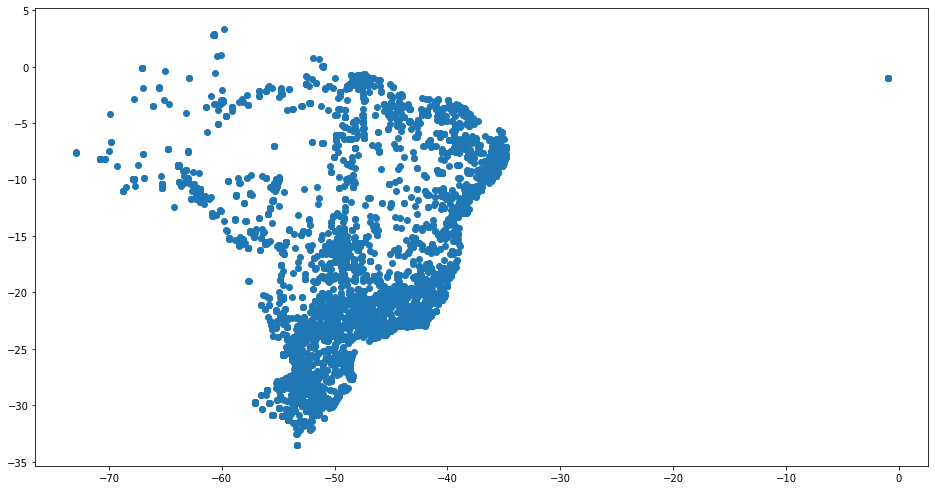

In [21]:
# Um plot simples para verificar a localização dos clientes.

gdf.plot()

<a name="DATAANALYSIS"></a>
<a href='#TOPO'>Voltar ao índice</a>
<h1>Análise e Visualização dos Dados </h1>

Bom, até o momento realizamos a limpeza em nossos dados para deixá-los melhores para realizar processos de cálculos e plotagem. A partir de agora, vamos realizar alguns *Insights* a partir das informações contidas nessa planilha.
Além de outras perguntas, queremos sanar os seguintes questionamentos:

- Qual é a faixa etária dos clientes?
- Qual a faixa salarial de maior ocorrência?
- Qual a Faixa Salarial de cada Geração?
- Os clientes estão concentrados em quais municípios/regiões?
- Qual segmento teremos ao agrupar dados do Município, Faixa Salarial e Faixa Etária?

### Qual a faixa etária dos clientes?

Foi criado uma nova coluna com a idade dos cliente.

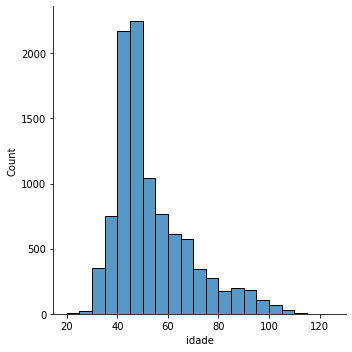

In [22]:
#Função que defina a idade dos clientes de acordo com a coluna ano
data['idade']  = data['ano'].apply(lambda x: 2021 - x)

#Histograma com a distribuição da idade dos clientes
sns.displot(data, x="idade", bins=30, binwidth=5)

Para verificar a Assimetria da Distribuição de clientes por idade foi verificado o *skewness*. Ao analisar o histograma podemos perceber que a assimetria é positiva, pois a cauda está para o lado direito. A média e a mediana também está à direita.

In [23]:
#Mediana do ano de nascimento
data.idade.median()

48.0

In [24]:
#Média do ano de nascimento
data.idade.mean()

52.988023349436396

In [25]:
#Moda do ano de nascimento
data.idade.mode()

0    45.0
dtype: float64

In [26]:
# Assimetria - Skewness
data.idade.skew()

1.2516207961843453

Assimetria Positiva - Quando o skewness é menor que -1 maior que 1, os dados são altamente assimétricos

Vamos plotar um Histograma da coluna **'ano'** para visualizar os anos de nascimento dos clientes

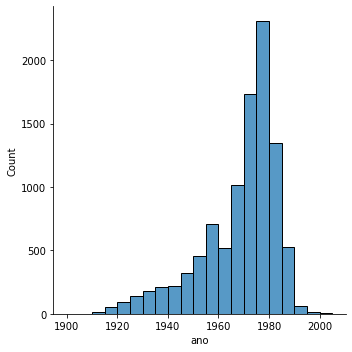

In [27]:
sns.displot(data, x="ano", bins=30, binwidth=5)

Para verificação de *Outliers* foi plotado um gráfico do tipo *BoxPlot*

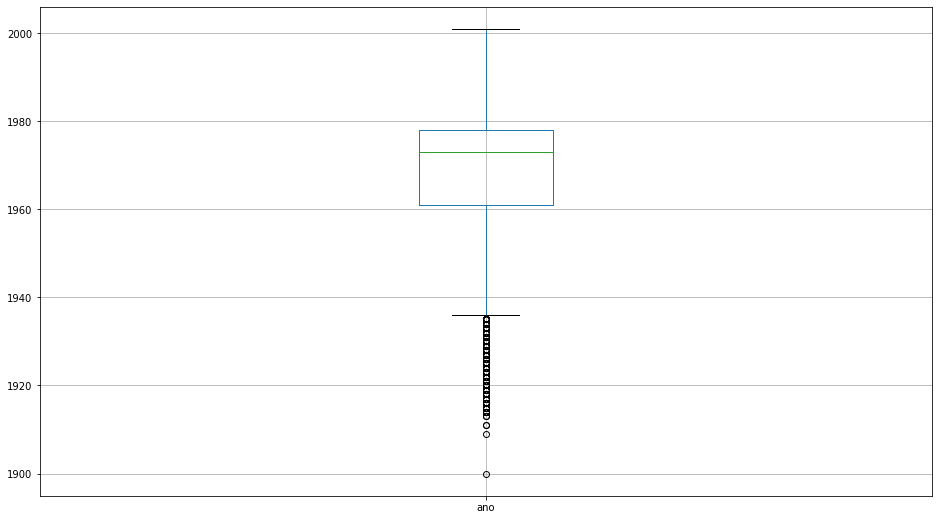

In [28]:
plt.rcParams["figure.figsize"] = [16,9]
boxplot = gdf.boxplot(column=['ano'])

Como já observado no *Describe*, podemos observar que nossa massa de clientes está entre os anos de 1960 a 1979. Há alguns valores isolados logo abaixo nos anos de 1900 a ~1936

Após uma revisão bibliográfica em alguns artigos, pode se perceber que algumas empresas de marketings segmentam seus clientes de acordo com o Recorte de Gerações.
Os anos na divisão de gerações diferem de um artigo para o outro. Para esse estudo foi utilizado as informações de 2017 da Revista Exame (https://bit.ly/2PxsdBy) e de 2018 do SINGEP (https://bit.ly/3flbqgh).
![geracoes](https://github.com/arcursino/credit-bureau/blob/master/imagens/geracoes.png)

In [29]:
#Criação de categorias para Gerações
gdf['geracoes'] = pd.cut(gdf['ano'],
        bins = (1900, 1940, 1960, 1980, 1994, 2001),
        labels = ('1900 a 1940 - Veteranos', '1940 a 1959 - Baby Boomers ', '1960 a 1979 - Geração X', '1980 a 1994 - Geração Y', '1994 a 2010 - Geração Z'))

In [30]:
gdf.head(2)

id    dat_nsc  \
0  d6c0cc1d-eb61-486a-b5c3-50725ef44d61 1981-01-30   
1  da0067e7-aa6b-4355-b373-ca17f6ac3b44 1978-01-28   

                          renda   latitude  longitude     ano  mes   dia  \
0  DE R$ 1.900,00 A R$ 3.800,00  -4.847580 -37.784390  1981.0  1.0  30.0   
1  DE R$ 3.800,00 A R$ 7.600,00 -26.990118 -48.637165  1978.0  1.0  28.0   

   hora                     geometry  idade                 geracoes  
0   0.0   POINT (-37.78439 -4.84758)   40.0  1980 a 1994 - Geração Y  
1   0.0  POINT (-48.63717 -26.99012)   43.0  1960 a 1979 - Geração X

### Qual a faixa salarial de maior ocorrência?

Quais as faixas salariais que nossos clientes se encontram?
Ao verificar os valores contidos na coluna **renda**, percebeu-se que está faltando a faixa salarial de 1.140,00 a 1.900,00 reais

In [31]:
data.renda.unique()

array(['DE R$ 1.900,00 A R$ 3.800,00', 'DE R$ 3.800,00 A R$ 7.600,00',
       'DE R$ 788,00 A R$ 1.140,00', 'MAIOR QUE R$ 7.600,00'],
      dtype=object)

In [32]:
import plotly.express as px
df = px.data.tips()
fig = px.pie(gdf, names='renda')
fig.update_layout(showlegend=True)
fig.show()

Cerca de 48% dos Clientes estão na faixa salarial de 1.900,00 - 3.000,00

### Qual a Faixa Salarial de cada Geração?

<AxesSubplot:title={'center':'Faixa Salarial por Geração'}, xlabel='geracoes'>

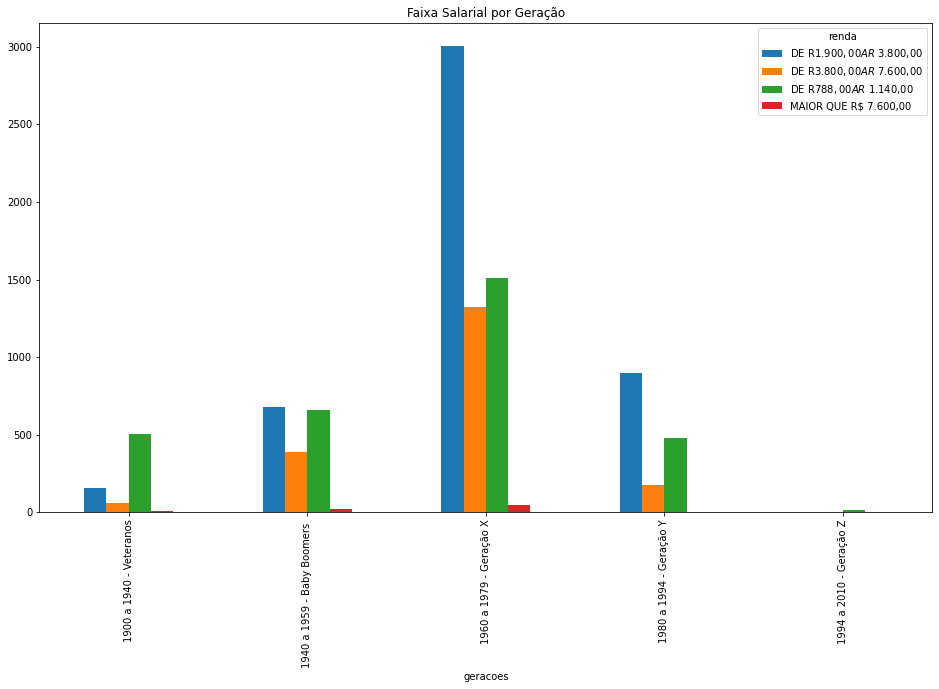

In [68]:
#Cruzamento dos dados das geraçoes por renda
renda_geracao = pd.crosstab(gdf['geracoes'],gdf['renda']).apply(lambda r: r/r.sum(), axis=1) * 100
renda_geracao.plot(kind='bar',width=0.5, title='Faixa Salarial por Geração')

### Os clientes estão concentrados em quais municípios/regiões?

Para Visualização das regiões com mais incidência de clientes, iremos utilizar a Biblioteca Folium.

In [34]:
import folium
from folium import plugins

In [35]:
# Elimina as linhas que possuem dados faltantes
data.dropna(inplace=True)
data.isnull().sum()

id           0
dat_nsc      0
renda        0
latitude     0
longitude    0
ano          0
mes          0
dia          0
hora         0
geometry     0
idade        0
geracoes     0
dtype: int64

### Criação de um Mapa com a localização e o agrupamento dos clientes

In [36]:
from folium.plugins import FastMarkerCluster
import sys

In [37]:
# Cria o Mapa
fmap = folium.Map(
                location=[-16.1237611, -59.9219642],   
                zoom_start=4,
                control_scale=True,
                prefer_canvas=True)

In [38]:
#Cria os clusters
cluster_df = gdf[['latitude', 'longitude']]
cluster_df = cluster_df.dropna(axis=0, subset=['latitude','longitude'])

# List comprehension to make out list of lists
cluster_data = [[row['latitude'],row['longitude']] for index, row in cluster_df.iterrows()]

# Plot it on the map
FastMarkerCluster(cluster_data).add_to(fmap)

# Display the map
fmap

### Criação de um Mapa de calor com a localização dos clientes

In [39]:
from folium.plugins import HeatMap

In [40]:
# Cria o Mapa
fmap = folium.Map(
                location=[-16.1237611, -59.9219642],   
                zoom_start=4,
                control_scale=True,
                prefer_canvas=True)

In [41]:
heat_df = gdf[['latitude', 'longitude']]
heat_df = heat_df.dropna(axis=0, subset=['latitude','longitude'])

# List comprehension to make out list of lists
heat_data = [[row['latitude'],row['longitude']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(fmap)

# Display the map
fmap

### Mas em quais Estados e Municipíos os clientes estão??

Para isso, foi utilizado os dados do IBGE no site: https://bit.ly/39e59PB

Foi escolhido o zip **BR_Municipios_2020** para criar um geodaframe com o *geometry* da Malha Municipal

In [42]:
brasil = geopandas.read_file('BR_Municipios_2020.shp')

In [43]:
brasil.head(5)

CD_MUN                 NM_MUN SIGLA_UF  AREA_KM2  \
0  1100015  Alta Floresta D'Oeste       RO  7067.127   
1  1100023              Ariquemes       RO  4426.571   
2  1100031                 Cabixi       RO  1314.352   
3  1100049                 Cacoal       RO  3793.000   
4  1100056             Cerejeiras       RO  2783.300   

                                            geometry  
0  POLYGON ((-62.19465 -11.82746, -62.19332 -11.8...  
1  POLYGON ((-62.53648 -9.73222, -62.52765 -9.736...  
2  POLYGON ((-60.37119 -13.36655, -60.37134 -13.3...  
3  POLYGON ((-61.00080 -11.29737, -61.00103 -11.3...  
4  POLYGON ((-61.49976 -13.00525, -61.49809 -13.0...

In [44]:
# For para descobrir quantos clientes por municipio e a criação de uma nova coluna com o
# número de clientes.

for index, municipio in brasil.iterrows():
  qtd_cliente = len(gdf[gdf.intersects(municipio.geometry)])
  brasil.loc[index, 'qtd_cliente'] = qtd_cliente

In [45]:
brasil.head(5)

CD_MUN                 NM_MUN SIGLA_UF  AREA_KM2  \
0  1100015  Alta Floresta D'Oeste       RO  7067.127   
1  1100023              Ariquemes       RO  4426.571   
2  1100031                 Cabixi       RO  1314.352   
3  1100049                 Cacoal       RO  3793.000   
4  1100056             Cerejeiras       RO  2783.300   

                                            geometry  qtd_cliente  
0  POLYGON ((-62.19465 -11.82746, -62.19332 -11.8...          2.0  
1  POLYGON ((-62.53648 -9.73222, -62.52765 -9.736...          4.0  
2  POLYGON ((-60.37119 -13.36655, -60.37134 -13.3...          0.0  
3  POLYGON ((-61.00080 -11.29737, -61.00103 -11.3...          1.0  
4  POLYGON ((-61.49976 -13.00525, -61.49809 -13.0...          3.0

Qual o Top 10 municípios com mais clientes:

In [46]:
brasil.nlargest(10,["qtd_cliente"])

CD_MUN          NM_MUN SIGLA_UF   AREA_KM2  \
3242  3304557  Rio de Janeiro       RJ   1200.329   
4931  4314902    Porto Alegre       RS    495.390   
2162  2927408        Salvador       BA    693.453   
3829  3550308       São Paulo       SP   1521.110   
4005  4106902        Curitiba       PR    434.892   
111   1302603          Manaus       AM  11401.092   
5417  5208707         Goiânia       GO    728.841   
2309  3106200  Belo Horizonte       MG    331.354   
5569  5300108        Brasília       DF   5760.784   
1596  2611606          Recife       PE    218.843   

                                               geometry  qtd_cliente  
3242  MULTIPOLYGON (((-43.56883 -23.08162, -43.56886...        406.0  
4931  MULTIPOLYGON (((-51.16347 -30.26269, -51.16317...        188.0  
2162  POLYGON ((-38.56330 -12.73664, -38.56117 -12.7...        172.0  
3829  POLYGON ((-46.54624 -23.35791, -46.54585 -23.3...        141.0  
4005  POLYGON ((-49.26489 -25.34813, -49.26455 -25.3...        141.0  
111   POLYGON ((-60.24162 -1.99757, -60.23298 -2.003...        136.0  
5417  POLYGON ((-49.17655 -16.46519, -49.17717 -16.4...        116.0  
2309  POLYGON ((-43.94948 -19.77643, -43.94946 -19.7...        113.0  
5569  POLYGON ((-47.41734 -15.54655, -47.41720 -15.5...         86.0  
1596  POLYGON ((-34.99971 -7.92977, -34.99953 -7.929...         78.0

Temos dois geodataframes para fazer a uní-los, for realizado um inner join, com a Intersecção da coluna **'geometry'** 

In [47]:
#Importando módulos necessários para fazer o inner join
import rtree
import pygeos

In [48]:
gdf_total = geopandas.sjoin(gdf, brasil, how="inner", op='intersects')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4674




Ambos Geodataframes precisa estar com no mesmo Sistemas de Referência de Coordenadas
O *Coordinate Reference System* (CRS) é importante porque as formas geométricas em um objeto GeoSeries ou GeoDataFrame são simplesmente uma coleção de coordenadas em um espaço arbitrário. Um CRS informa ao Python como essas coordenadas se relacionam com os lugares da Terra.

In [49]:
#Comando necessário para para colocar o Geodataframe criado a partir do dataset no mesmo
#CRS do Geodataframe gerado a partir do ShapeFile do IBGE

gdf.set_crs(epsg=4674, inplace=True)

id    dat_nsc  \
0     d6c0cc1d-eb61-486a-b5c3-50725ef44d61 1981-01-30   
1     da0067e7-aa6b-4355-b373-ca17f6ac3b44 1978-01-28   
2     2d729b8a-d53c-48e7-8bf5-33b021980c04 1954-12-09   
3     62c0f1e6-36f2-4205-a134-232a58a6f8a5 1975-08-28   
4     0cef9719-0aa3-49a2-adea-9c09c04de071 1957-06-17   
...                                    ...        ...   
9995  f2261fce-83c5-4f64-b145-85f46bcf18b1 1979-10-08   
9996  bdaa7802-4650-44a4-93f7-952b72ec17a0 1980-04-30   
9997  e7b37cd5-714a-44d8-ad7f-4ed3aa6b0695 1976-05-26   
9998  167dbd7f-7ccd-4aad-a6b9-c3fb9d56c9cd 1985-11-06   
9999  d4f11ca2-71b1-4e12-aba6-bd8530ca2691 1981-03-09   

                             renda   latitude  longitude     ano   mes   dia  \
0     DE R$ 1.900,00 A R$ 3.800,00  -4.847580 -37.784390  1981.0   1.0  30.0   
1     DE R$ 3.800,00 A R$ 7.600,00 -26.990118 -48.637165  1978.0   1.0  28.0   
2     DE R$ 3.800,00 A R$ 7.600,00  -5.053671 -42.813152  1954.0  12.0   9.0   
3       DE R$ 788,00 A R$ 1.140,00 -15.059042 -48.163372  1975.0   8.0  28.0   
4       DE R$ 788,00 A R$ 1.140,00 -17.694658 -42.522280  1957.0   6.0  17.0   
...                            ...        ...        ...     ...   ...   ...   
9995  DE R$ 1.900,00 A R$ 3.800,00 -11.609372 -47.047506  1979.0  10.0   8.0   
9996  DE R$ 3.800,00 A R$ 7.600,00 -15.650497 -47.793321  1980.0   4.0  30.0   
9997    DE R$ 788,00 A R$ 1.140,00  -8.330679 -36.136897  1976.0   5.0  26.0   
9998    DE R$ 788,00 A R$ 1.140,00  -0.999990  -0.999990  1985.0  11.0   6.0   
9999  DE R$ 3.800,00 A R$ 7.600,00 -15.787504 -48.139096  1981.0   3.0   9.0   

      hora                     geometry  idade                     geracoes  
0      0.0   POINT (-37.78439 -4.84758)   40.0      1980 a 1994 - Geração Y  
1      0.0  POINT (-48.63717 -26.99012)   43.0      1960 a 1979 - Geração X  
2      0.0   POINT (-42.81315 -5.05367)   67.0  1940 a 1959 - Baby Boomers   
3      0.0  POINT (-48.16337 -15.05904)   46.0      1960 a 1979 - Geração X  
4      0.0  POINT (-42.52228 -17.69466)   64.0  1940 a 1959 - Baby Boomers   
...    ...                          ...    ...                          ...  
9995   0.0  POINT (-47.04751 -11.60937)   42.0      1960 a 1979 - Geração X  
9996   0.0  POINT (-47.79332 -15.65050)   41.0      1960 a 1979 - Geração X  
9997   0.0   POINT (-36.13690 -8.33068)   45.0      1960 a 1979 - Geração X  
9998   0.0    POINT (-0.99999 -0.99999)   36.0      1980 a 1994 - Geração Y  
9999   0.0  POINT (-48.13910 -15.78750)   40.0      1980 a 1994 - Geração Y  

[10000 rows x 12 columns]

In [50]:
#Novamente o comando para dar o inner join entre os geodataframes
gdf_total = geopandas.sjoin(gdf, brasil, how="inner", op='intersects')

In [51]:
gdf_total.head(2)

id    dat_nsc  \
0  d6c0cc1d-eb61-486a-b5c3-50725ef44d61 1981-01-30   
1  da0067e7-aa6b-4355-b373-ca17f6ac3b44 1978-01-28   

                          renda   latitude  longitude     ano  mes   dia  \
0  DE R$ 1.900,00 A R$ 3.800,00  -4.847580 -37.784390  1981.0  1.0  30.0   
1  DE R$ 3.800,00 A R$ 7.600,00 -26.990118 -48.637165  1978.0  1.0  28.0   

   hora                     geometry  idade                 geracoes  \
0   0.0   POINT (-37.78439 -4.84758)   40.0  1980 a 1994 - Geração Y   
1   0.0  POINT (-48.63717 -26.99012)   43.0  1960 a 1979 - Geração X   

   index_right   CD_MUN              NM_MUN SIGLA_UF  AREA_KM2  qtd_cliente  
0          985  2307007          Jaguaruana       CE   854.362          1.0  
1         4337  4202008  Balneário Camboriú       SC    45.214         13.0

In [52]:
gdf_total.dtypes

id                     object
dat_nsc        datetime64[ns]
renda                  object
latitude              float64
longitude             float64
ano                   float64
mes                   float64
dia                   float64
hora                  float64
geometry             geometry
idade                 float64
geracoes             category
index_right             int64
CD_MUN                 object
NM_MUN                 object
SIGLA_UF               object
AREA_KM2              float64
qtd_cliente           float64
dtype: object

In [53]:
#Verificar as colunas do novo geodataframe
gdf_total.columns

Index(['id', 'dat_nsc', 'renda', 'latitude', 'longitude', 'ano', 'mes', 'dia',
       'hora', 'geometry', 'idade', 'geracoes', 'index_right', 'CD_MUN',
       'NM_MUN', 'SIGLA_UF', 'AREA_KM2', 'qtd_cliente'],
      dtype='object')

In [54]:
gdf1 = gdf_total.drop(['dat_nsc', 'dia', 'hora', 'index_right','CD_MUN',
               'AREA_KM2', 'qtd_cliente'], axis=1)

In [59]:
gdf_uf = gdf1.groupby(['SIGLA_UF','renda', 'geracoes'])['id'].count()

In [58]:
brasil.nlargest(10,["qtd_cliente"])

CD_MUN          NM_MUN SIGLA_UF   AREA_KM2  \
3242  3304557  Rio de Janeiro       RJ   1200.329   
4931  4314902    Porto Alegre       RS    495.390   
2162  2927408        Salvador       BA    693.453   
3829  3550308       São Paulo       SP   1521.110   
4005  4106902        Curitiba       PR    434.892   
111   1302603          Manaus       AM  11401.092   
5417  5208707         Goiânia       GO    728.841   
2309  3106200  Belo Horizonte       MG    331.354   
5569  5300108        Brasília       DF   5760.784   
1596  2611606          Recife       PE    218.843   

                                               geometry  qtd_cliente  
3242  MULTIPOLYGON (((-43.56883 -23.08162, -43.56886...        406.0  
4931  MULTIPOLYGON (((-51.16347 -30.26269, -51.16317...        188.0  
2162  POLYGON ((-38.56330 -12.73664, -38.56117 -12.7...        172.0  
3829  POLYGON ((-46.54624 -23.35791, -46.54585 -23.3...        141.0  
4005  POLYGON ((-49.26489 -25.34813, -49.26455 -25.3...        141.0  
111   POLYGON ((-60.24162 -1.99757, -60.23298 -2.003...        136.0  
5417  POLYGON ((-49.17655 -16.46519, -49.17717 -16.4...        116.0  
2309  POLYGON ((-43.94948 -19.77643, -43.94946 -19.7...        113.0  
5569  POLYGON ((-47.41734 -15.54655, -47.41720 -15.5...         86.0  
1596  POLYGON ((-34.99971 -7.92977, -34.99953 -7.929...         78.0

In [60]:
gdf_rj = gdf1.query('SIGLA_UF == "RJ"')
gdf_rj_group = gdf_rj.groupby(['renda', 'geracoes'])['id'].count()
gdf_rj_group

renda                         geracoes                   
DE R$ 1.900,00 A R$ 3.800,00  1900 a 1940 - Veteranos         17
                              1940 a 1959 - Baby Boomers      57
                              1960 a 1979 - Geração X        165
                              1980 a 1994 - Geração Y          6
                              1994 a 2010 - Geração Z          0
DE R$ 3.800,00 A R$ 7.600,00  1900 a 1940 - Veteranos         12
                              1940 a 1959 - Baby Boomers      41
                              1960 a 1979 - Geração X        273
                              1980 a 1994 - Geração Y          4
                              1994 a 2010 - Geração Z          0
DE R$ 788,00 A R$ 1.140,00    1900 a 1940 - Veteranos         24
                              1940 a 1959 - Baby Boomers      36
                              1960 a 1979 - Geração X         40
                              1980 a 1994 - Geração Y          5
                              19

<AxesSubplot:ylabel='geracoes'>

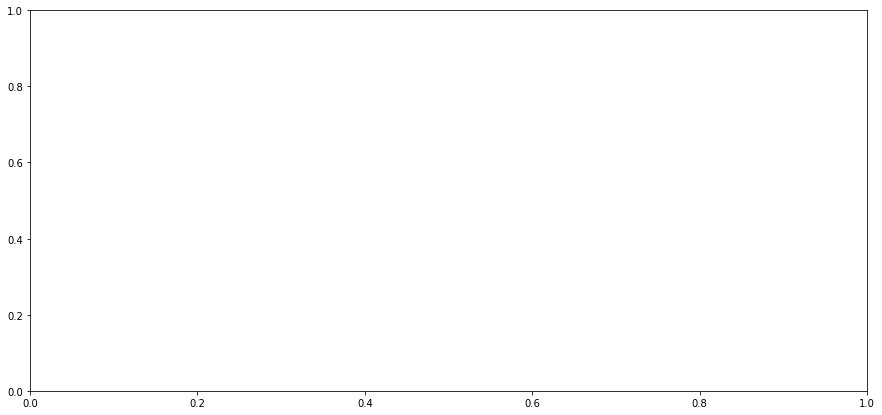

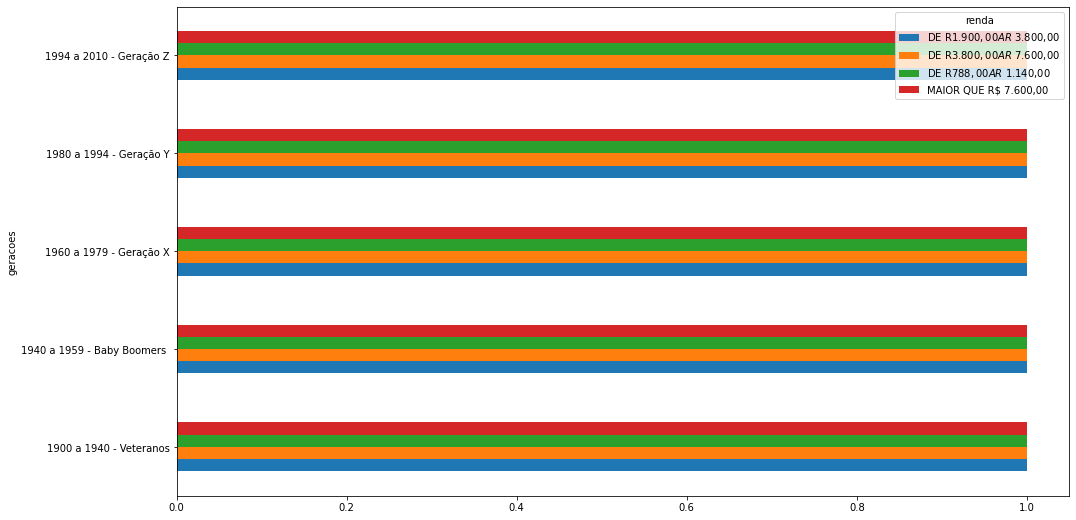

In [67]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
gdf_rj_group.groupby(['renda','geracoes']).count().unstack(0).plot.barh()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import  PCA
from sklearn.preprocessing import  MinMaxScaler

In [ ]:
gdf1.tail(2)

In [ ]:
gdf1 = gdf1.drop(['renda'], axis=1)

In [ ]:
gdf1.head(2)

In [ ]:
gdf1.loc[gdf1.renda == 'DE R$ 1.900,00 A R$ 3.800,00', 'renda $'] = '1.900,00 - 3.800,00'
gdf1.loc[gdf1.renda == 'DE R$ 3.800,00 A R$ 7.600,00', 'renda $'] = '3.800,00 - 7.600,00'
gdf1.loc[gdf1.renda == 'DE R$ 788,00 A R$ 1.140,00', 'renda $'] = '788,00 - 1.140,00'
gdf1.loc[gdf1.renda == 'MAIOR QUE R$ 7.600,00', 'renda $'] = 'Maior que 7.600,00'

In [ ]:
gdf1['geracoes'] = pd.Categorical(gdf1['geracoes'])
gdf1['NM_MUN'] = pd.Categorical(gdf1['NM_MUN'])
gdf1['SIGLA_UF'] = pd.Categorical(gdf1['SIGLA_UF'])
gdf1['renda $'] = pd.Categorical(gdf1['renda $'])

In [ ]:
gdf1['geracoes_cat'] = gdf1['geracoes'].cat.codes
gdf1['cidade_cat'] = gdf1['NM_MUN'].cat.codes
gdf1['uf_cat'] = gdf1['SIGLA_UF'].cat.codes
gdf1['renda_cat'] = gdf1['renda $'].cat.codes


gdf1.head(2)

In [ ]:
gdf1.columns

In [ ]:
gdf1_seg = gdf1[['geracoes_cat', 'uf_cat', 'renda_cat']]

In [ ]:
gdf1_seg.head(2)

Encontrar Grupos de Clientes com características semelhantes

In [ ]:
#Normalização com média 0 e desvio 1
normaliza = MinMaxScaler()

In [ ]:
X_std = normaliza.fit_transform(gdf1_seg)

In [ ]:
#aplicando a curva do cotovelo para encontrar o número de clusters
ks = range(1,10)
inertias = []
for k in ks:
    #cria o objeto para modelo k-means para os testes
    model = KMeans(n_clusters=k)
    
    #aplica nos componentes selecionados
    model.fit(X_std)
    
    #adiciona os valores para a distância (agitação)
    inertias.append(model.inertia_)
    

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('Número de Cluster, k')
plt.ylabel('Distâncias')
plt.xticks(ks)
plt.show()

## Aplicando o Kmeans

In [ ]:
gdf1_norma = pd.DataFrame(X_std, columns=['geracoes_cat', 'uf_cat', 'renda_cat'])

In [ ]:
gdf1_norma.head(2)

In [ ]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(gdf1_norma)
gdf1_norma['cluster'] = clusters
gdf1_norma.head(5)

In [ ]:
#retornando os dados
retorno = normaliza.inverse_transform(X_std)

In [ ]:
gdf1_retorno = pd.DataFrame(retorno, columns=['geracoes_cat', 'uf_cat', 'renda_cat'])
gdf1_retorno['cluster'] = clusters
gdf1_retorno.head()

In [ ]:
gdf1_retorno.groupby(['renda_cat', 'geracoes_cat'])['cluster'].count()

In [ ]:
gdf1.columns

In [ ]:
gdf1.groupby(['renda $', 'geracoes'])['id'].count()

In [ ]:
gdf_uf.head()

In [ ]:
gdf_rj.describe()

In [ ]:
gdf1_retorno.columns

In [ ]:
gdf1_retorno.groupby('renda_cat').agg({'cluster': 'count'}).rename(
                                                columns={'cluster': 'qtd'})

In [ ]:
media_lat = gdf1['latitude'].mean()
media_lon = gdf1['longitude'].mean()

In [ ]:
gdf1.isnull().sum()

In [ ]:
import folium